In [1]:
# Importing necessary packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from scipy.stats import iqr
from sklearn import preprocessing

In [2]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_excel("default.xls", index_col=0, header=0)
df = df.iloc[1:, :]
# Checking import 
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
df = df.reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Changing data type to float 
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
X1     30000 non-null int64
X2     30000 non-null int64
X3     30000 non-null int64
X4     30000 non-null int64
X5     30000 non-null int64
X6     30000 non-null int64
X7     30000 non-null int64
X8     30000 non-null int64
X9     30000 non-null int64
X10    30000 non-null int64
X11    30000 non-null int64
X12    30000 non-null int64
X13    30000 non-null int64
X14    30000 non-null int64
X15    30000 non-null int64
X16    30000 non-null int64
X17    30000 non-null int64
X18    30000 non-null int64
X19    30000 non-null int64
X20    30000 non-null int64
X21    30000 non-null int64
X22    30000 non-null int64
X23    30000 non-null int64
Y      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [5]:
# checking for null values 
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
# Separating Target from rest of data 
target = df.iloc[:, -1:]

# Taking target out of main dataframe 
df = df.iloc[:, :-1]
target.head()

,Y
0,1
1,1
2,0
3,0
4,0


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

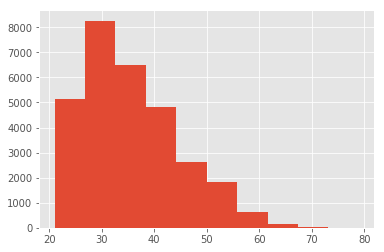

In [7]:
# Binning of Age Variable
# Checking distribution of Age in the Dataset 
df['X5'].hist()
df['X5'].describe()

In [8]:
# Trying to create bins out of the age variable
pd.qcut(df['X5'], 3)
# Creating 3 equal height bins for Age 

0        (20.999, 30.0]
1        (20.999, 30.0]
2          (30.0, 39.0]
3          (30.0, 39.0]
4          (39.0, 79.0]
5          (30.0, 39.0]
6        (20.999, 30.0]
7        (20.999, 30.0]
8        (20.999, 30.0]
9          (30.0, 39.0]
10         (30.0, 39.0]
11         (39.0, 79.0]
12         (39.0, 79.0]
13       (20.999, 30.0]
14       (20.999, 30.0]
15       (20.999, 30.0]
16       (20.999, 30.0]
17         (39.0, 79.0]
18         (39.0, 79.0]
19       (20.999, 30.0]
20         (30.0, 39.0]
21         (30.0, 39.0]
22       (20.999, 30.0]
23         (39.0, 79.0]
24       (20.999, 30.0]
25       (20.999, 30.0]
26       (20.999, 30.0]
27       (20.999, 30.0]
28         (39.0, 79.0]
29       (20.999, 30.0]
              ...      
29970      (30.0, 39.0]
29971      (30.0, 39.0]
29972      (30.0, 39.0]
29973      (30.0, 39.0]
29974      (30.0, 39.0]
29975      (39.0, 79.0]
29976      (39.0, 79.0]
29977      (30.0, 39.0]
29978      (30.0, 39.0]
29979      (30.0, 39.0]
29980      (39.0

In [9]:
def binning(X5):
    if X5 > 20 and X5 <= 30:                
        return(0)
    if X5 > 30 and X5 <= 39:        
        return(1)
    if X5 > 39:      
        return(2)
df['X5_Bins'] = df['X5'].apply(binning)
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X5_Bins
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,2
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,1
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,1


In [10]:
df = df.drop(['X5'], axis=1)

In [11]:
df['X6_BI']= np.where(df['X6']>0 ,1,0)
df['X7_BI']= np.where(df['X7']>0 ,1,0)
df['X8_BI']= np.where(df['X8']>0 ,1,0)
df['X9_BI']= np.where(df['X9']>0 ,1,0)
df['X10_BI']= np.where(df['X10']>0 ,1,0)
df['X11_BI']= np.where(df['X11']>0 ,1,0)
df.head()

,X1,X2,X3,X4,X6,X7,X8,X9,X10,X11,...,X21,X22,X23,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,0,1,1,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,...,1000,0,2000,0,0,1,0,0,0,1
2,90000,2,2,2,0,0,0,0,0,0,...,1000,1000,5000,1,0,0,0,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,...,1100,1069,1000,1,0,0,0,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,9000,689,679,2,0,0,0,0,0,0


In [12]:
df = df.drop(['X6', 'X7', 'X8', 'X10', 'X11', 'X9'], axis=1)

In [13]:
df['X12_BI']= np.where(df['X12']>0 ,1,0)
df['X13_BI']= np.where(df['X13']>0 ,1,0)
df['X14_BI']= np.where(df['X14']>0 ,1,0)
df['X15_BI']= np.where(df['X15']>0 ,1,0)
df['X16_BI']= np.where(df['X16']>0 ,1,0)
df['X17_BI']= np.where(df['X17']>0 ,1,0)
df.head(5)

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X8_BI,X9_BI,X10_BI,X11_BI,X12_BI,X13_BI,X14_BI,X15_BI,X16_BI,X17_BI
0,20000,2,2,1,3913,3102,689,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,0,0,0,1,1,1,1,1,1,1
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,0,0,0,0,1,1,1,1,1,1
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,0,0,0,0,1,1,1,1,1,1
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,0,0,0,0,1,1,1,1,1,1


In [14]:
df['X12_ABS'] = abs(df['X12'])
df['X13_ABS'] = abs(df['X13'])
df['X14_ABS'] = abs(df['X14'])
df['X15_ABS'] = abs(df['X15'])
df['X16_ABS'] = abs(df['X16'])
df['X17_ABS'] = abs(df['X17'])
df.head(5)

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X14_BI,X15_BI,X16_BI,X17_BI,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
0,20000,2,2,1,3913,3102,689,0,0,0,...,1,0,0,0,3913,3102,689,0,0,0
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,1,1,1,1,2682,1725,2682,3272,3455,3261
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,1,1,1,1,29239,14027,13559,14331,14948,15549
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,1,1,1,1,46990,48233,49291,28314,28959,29547
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,1,1,1,1,8617,5670,35835,20940,19146,19131


In [15]:
df['X12_M']= np.where(df['X12'].isnull(),6,6)
df['X13_M']= np.where(df['X13'].isnull(),5,5)
df['X14_M']= np.where(df['X14'].isnull(),4,4)
df['X15_M']= np.where(df['X15'].isnull(),3,3)
df['X16_M']= np.where(df['X16'].isnull(),2,2)
df['X17_M']= np.where(df['X17'].isnull(),1,1)
df.head()

,X1,X2,X3,X4,X12,X13,X14,X15,X16,X17,...,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X12_M,X13_M,X14_M,X15_M,X16_M,X17_M
0,20000,2,2,1,3913,3102,689,0,0,0,...,689,0,0,0,6,5,4,3,2,1
1,120000,2,2,2,2682,1725,2682,3272,3455,3261,...,2682,3272,3455,3261,6,5,4,3,2,1
2,90000,2,2,2,29239,14027,13559,14331,14948,15549,...,13559,14331,14948,15549,6,5,4,3,2,1
3,50000,2,2,1,46990,48233,49291,28314,28959,29547,...,49291,28314,28959,29547,6,5,4,3,2,1
4,50000,1,2,1,8617,5670,35835,20940,19146,19131,...,35835,20940,19146,19131,6,5,4,3,2,1


In [16]:
df = df.drop(['X12', 'X13', 'X14', 'X15', 'X16', 'X17'], axis=1)

In [17]:
df['X18_BI']= np.where(df['X18']>0 ,1,0)
df['X19_BI']= np.where(df['X19']>0 ,1,0)
df['X20_BI']= np.where(df['X20']>0 ,1,0)
df['X21_BI']= np.where(df['X21']>0 ,1,0)
df['X22_BI']= np.where(df['X22']>0 ,1,0)
df['X23_BI']= np.where(df['X23']>0 ,1,0)
df.head(5)

,X1,X2,X3,X4,X18,X19,X20,X21,X22,X23,...,X14_M,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI
0,20000,2,2,1,0,689,0,0,0,0,...,4,3,2,1,0,1,0,0,0,0
1,120000,2,2,2,0,1000,1000,1000,0,2000,...,4,3,2,1,0,1,1,1,0,1
2,90000,2,2,2,1518,1500,1000,1000,1000,5000,...,4,3,2,1,1,1,1,1,1,1
3,50000,2,2,1,2000,2019,1200,1100,1069,1000,...,4,3,2,1,1,1,1,1,1,1
4,50000,1,2,1,2000,36681,10000,9000,689,679,...,4,3,2,1,1,1,1,1,1,1


In [18]:
df = df.drop(['X18', 'X19', 'X20', 'X21', 'X22', 'X23'], axis=1)

In [19]:
# Defining functin to replace outliers using IQR of each column
def outlier_replace(x): 
    if x > (Q3 + (1.5*IQR)): 
        x = Q3
    elif x < (Q1 - (1.5*IQR)): 
        x = Q1
    else: 
        pass
    return(x)

Text(0.5, 1.0, 'Fixed Outliers')

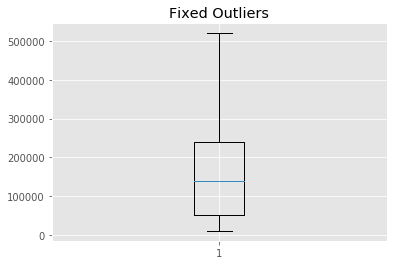

In [20]:
Q1 = df['X1'].quantile(0.25)
Q3 = df['X1'].quantile(0.75)
IQR = iqr(df['X1'])
df['X1'] = df['X1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X1'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

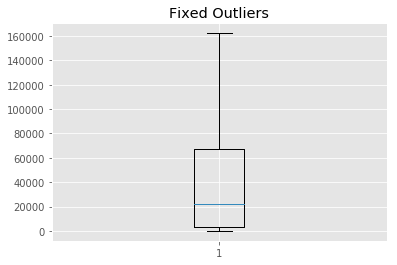

In [21]:
Q1 = df['X12_ABS'].quantile(0.25)
Q3 = df['X12_ABS'].quantile(0.75)
IQR = iqr(df['X12_ABS'])
df['X12_ABS'] = df['X12_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X12_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

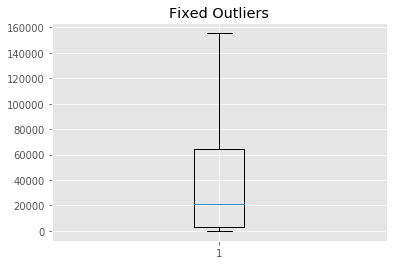

In [22]:
Q1 = df['X13_ABS'].quantile(0.25)
Q3 = df['X13_ABS'].quantile(0.75)
IQR = iqr(df['X13_ABS'])
df['X13_ABS'] = df['X13_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X13_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

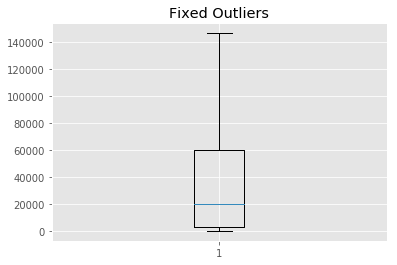

In [23]:
Q1 = df['X14_ABS'].quantile(0.25)
Q3 = df['X14_ABS'].quantile(0.75)
IQR = iqr(df['X14_ABS'])
df['X14_ABS'] = df['X14_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X14_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

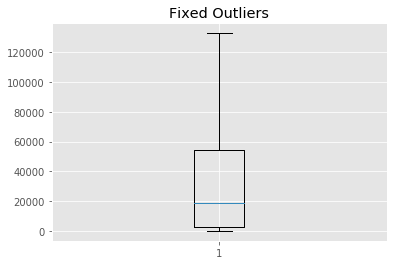

In [24]:
Q1 = df['X15_ABS'].quantile(0.25)
Q3 = df['X15_ABS'].quantile(0.75)
IQR = iqr(df['X15_ABS'])
df['X15_ABS'] = df['X15_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X15_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

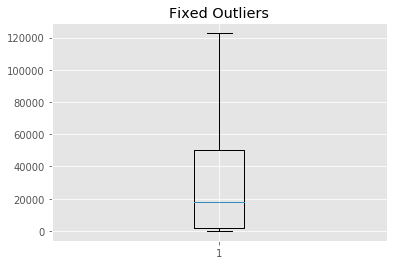

In [25]:
Q1 = df['X16_ABS'].quantile(0.25)
Q3 = df['X16_ABS'].quantile(0.75)
IQR = iqr(df['X16_ABS'])
df['X16_ABS'] = df['X16_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X16_ABS'])
plt.title("Fixed Outliers")

Text(0.5, 1.0, 'Fixed Outliers')

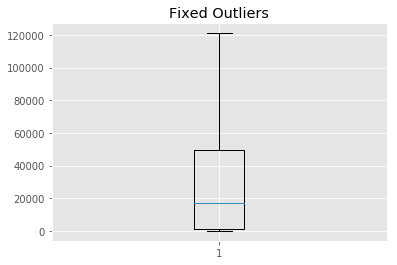

In [26]:
Q1 = df['X17_ABS'].quantile(0.25)
Q3 = df['X17_ABS'].quantile(0.75)
IQR = iqr(df['X17_ABS'])
df['X17_ABS'] = df['X17_ABS'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['X17_ABS'])
plt.title("Fixed Outliers")

In [27]:
dfnorm = df.filter(['X1', "X12_ABS", "X13_ABS", "X14_ABS", "X15_ABS", "X16_ABS", "X17_ABS"], axis=1)
df = df.drop(["X1", 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS', 'X16_ABS', 'X17_ABS'], axis=1)

In [28]:
dfnorm.head()

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
0,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0


In [29]:
cols = dfnorm.columns.values.tolist()
cols

['X1', 'X12_ABS', 'X13_ABS', 'X14_ABS', 'X15_ABS', 'X16_ABS', 'X17_ABS']

In [30]:
from sklearn.preprocessing import MinMaxScaler
minmax = preprocessing.MinMaxScaler()
dfnorm = (minmax.fit_transform(dfnorm))
dfnorm = pd.DataFrame(dfnorm, columns=cols)

In [31]:
dfnorm.head()

,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
0,0.019608,0.024110,0.019957,0.004710,0.000000,0.000000,0.000000
1,0.215686,0.016525,0.011098,0.018335,0.024640,0.028149,0.026937
2,0.156863,0.180158,0.090242,0.092694,0.107921,0.121786,0.128438
3,0.078431,0.289533,0.310304,0.336970,0.213221,0.235938,0.244065
4,0.078431,0.053094,0.036478,0.244980,0.157690,0.155988,0.158026


In [32]:
df = pd.concat([df,dfnorm], axis=1)
df.head()

,X2,X3,X4,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X21_BI,X22_BI,X23_BI,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
0,2,2,1,0,1,1,0,0,0,0,...,0,0,0,0.019608,0.024110,0.019957,0.004710,0.000000,0.000000,0.000000
1,2,2,2,0,0,1,0,0,0,1,...,1,0,1,0.215686,0.016525,0.011098,0.018335,0.024640,0.028149,0.026937
2,2,2,2,1,0,0,0,0,0,0,...,1,1,1,0.156863,0.180158,0.090242,0.092694,0.107921,0.121786,0.128438
3,2,2,1,1,0,0,0,0,0,0,...,1,1,1,0.078431,0.289533,0.310304,0.336970,0.213221,0.235938,0.244065
4,1,2,1,2,0,0,0,0,0,0,...,1,1,1,0.078431,0.053094,0.036478,0.244980,0.157690,0.155988,0.158026


In [33]:
df.skew()

X2        -0.424183
X3         0.970972
X4        -0.018742
X5_Bins    0.115017
X6_BI      1.301689
X7_BI      1.983384
X8_BI      2.069933
X9_BI      2.383292
X10_BI     2.686696
X11_BI     2.618870
X12_BI    -2.939901
X13_BI    -2.562779
X14_BI    -2.375783
X15_BI    -2.213715
X16_BI    -2.090760
X17_BI    -1.886434
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X18_BI    -1.711064
X19_BI    -1.667113
X20_BI    -1.508434
X21_BI    -1.397663
X22_BI    -1.327970
X23_BI    -1.223411
X1         0.873682
X12_ABS    1.126591
X13_ABS    1.130270
X14_ABS    1.139658
X15_ABS    1.147972
X16_ABS    1.158250
X17_ABS    1.177385
dtype: float64

-0.3673569837277125

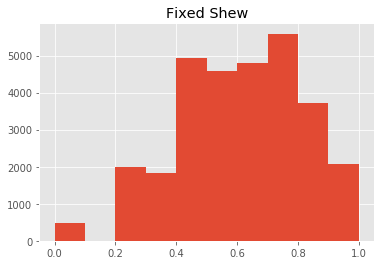

In [34]:
df['X1'] = np.cbrt(df['X1'])
plt.hist(df['X1'])
plt.title("Fixed Shew")
df['X1'].skew()

-0.21596601561186798

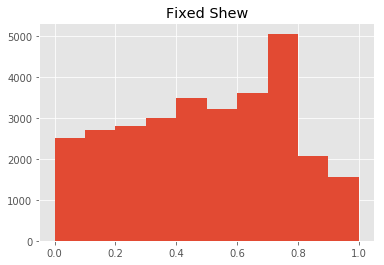

In [35]:
df['X12_ABS'] = np.cbrt(df['X12_ABS'])
plt.hist(df['X12_ABS'])
plt.title("Fixed Shew")
df['X12_ABS'].skew()

-0.23860429228030292

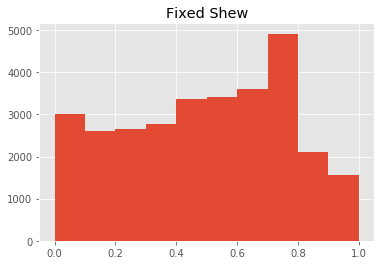

In [36]:
df['X13_ABS'] = np.cbrt(df['X13_ABS'])
plt.hist(df['X13_ABS'])
plt.title("Fixed Shew")
df['X13_ABS'].skew()

-0.2582702326298954

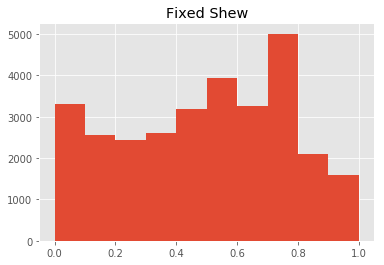

In [37]:
df['X14_ABS'] = np.cbrt(df['X14_ABS'])
plt.hist(df['X14_ABS'])
plt.title("Fixed Shew")
df['X14_ABS'].skew()

-0.2745391185254722

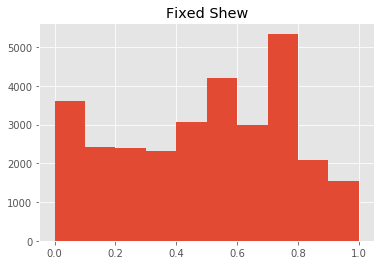

In [38]:
df['X15_ABS'] = np.cbrt(df['X15_ABS'])
plt.hist(df['X15_ABS'])
plt.title("Fixed Shew")
df['X15_ABS'].skew()

-0.26440658127810385

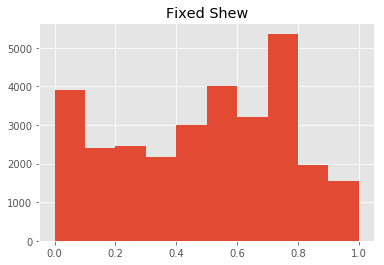

In [39]:
df['X16_ABS'] = np.cbrt(df['X16_ABS'])
plt.hist(df['X16_ABS'])
plt.title("Fixed Shew")
df['X16_ABS'].skew()

-0.22633309755669972

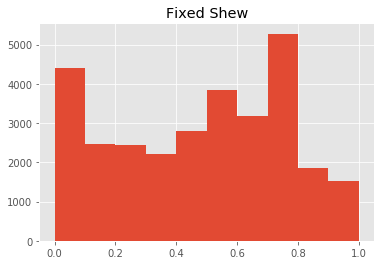

In [40]:
df['X17_ABS'] = np.cbrt(df['X17_ABS'])
plt.hist(df['X17_ABS'])
plt.title("Fixed Shew")
df['X17_ABS'].skew()

In [41]:
df.skew()

X2        -0.424183
X3         0.970972
X4        -0.018742
X5_Bins    0.115017
X6_BI      1.301689
X7_BI      1.983384
X8_BI      2.069933
X9_BI      2.383292
X10_BI     2.686696
X11_BI     2.618870
X12_BI    -2.939901
X13_BI    -2.562779
X14_BI    -2.375783
X15_BI    -2.213715
X16_BI    -2.090760
X17_BI    -1.886434
X12_M      0.000000
X13_M      0.000000
X14_M      0.000000
X15_M      0.000000
X16_M      0.000000
X17_M      0.000000
X18_BI    -1.711064
X19_BI    -1.667113
X20_BI    -1.508434
X21_BI    -1.397663
X22_BI    -1.327970
X23_BI    -1.223411
X1        -0.367357
X12_ABS   -0.215966
X13_ABS   -0.238604
X14_ABS   -0.258270
X15_ABS   -0.274539
X16_ABS   -0.264407
X17_ABS   -0.226333
dtype: float64

In [42]:
target.head()

,Y
0,1
1,1
2,0
3,0
4,0


In [43]:
df.head()

,X2,X3,X4,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X21_BI,X22_BI,X23_BI,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS
0,2,2,1,0,1,1,0,0,0,0,...,0,0,0,0.269656,0.288891,0.271245,0.167628,0.000000,0.000000,0.000000
1,2,2,2,0,0,1,0,0,0,1,...,1,0,1,0.599709,0.254713,0.223054,0.263690,0.290992,0.304196,0.299765
2,2,2,2,1,0,0,0,0,0,0,...,1,1,1,0.539312,0.564787,0.448541,0.452568,0.476104,0.495677,0.504543
3,2,2,1,1,0,0,0,0,0,0,...,1,1,1,0.428052,0.661555,0.677011,0.695874,0.597415,0.617920,0.624935
4,1,2,1,2,0,0,0,0,0,0,...,1,1,1,0.428052,0.375851,0.331646,0.625716,0.540258,0.538308,0.540642


In [44]:
df = pd.concat([df,target], axis=1)
df.head()

,X2,X3,X4,X5_Bins,X6_BI,X7_BI,X8_BI,X9_BI,X10_BI,X11_BI,...,X22_BI,X23_BI,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,Y
0,2,2,1,0,1,1,0,0,0,0,...,0,0,0.269656,0.288891,0.271245,0.167628,0.000000,0.000000,0.000000,1
1,2,2,2,0,0,1,0,0,0,1,...,0,1,0.599709,0.254713,0.223054,0.263690,0.290992,0.304196,0.299765,1
2,2,2,2,1,0,0,0,0,0,0,...,1,1,0.539312,0.564787,0.448541,0.452568,0.476104,0.495677,0.504543,0
3,2,2,1,1,0,0,0,0,0,0,...,1,1,0.428052,0.661555,0.677011,0.695874,0.597415,0.617920,0.624935,0
4,1,2,1,2,0,0,0,0,0,0,...,1,1,0.428052,0.375851,0.331646,0.625716,0.540258,0.538308,0.540642,0


In [45]:
# Exporting DataFrame as CSV 
df.to_csv('Final6', ',')

# **Splitting and Resampling Data**

In [46]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [48]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

# **Logistic Regression**

In [49]:
cols = df.columns.values
print(cols)

['X2' 'X3' 'X4' 'X5_Bins' 'X6_BI' 'X7_BI' 'X8_BI' 'X9_BI' 'X10_BI'
 'X11_BI' 'X12_BI' 'X13_BI' 'X14_BI' 'X15_BI' 'X16_BI' 'X17_BI' 'X12_M'
 'X13_M' 'X14_M' 'X15_M' 'X16_M' 'X17_M' 'X18_BI' 'X19_BI' 'X20_BI'
 'X21_BI' 'X22_BI' 'X23_BI' 'X1' 'X12_ABS' 'X13_ABS' 'X14_ABS' 'X15_ABS'
 'X16_ABS' 'X17_ABS' 'Y']


In [50]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg = logreg.fit(X_train_resample,y_train_resample)

#
y_pred=logreg.predict(X_test)

In [51]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4723, 1183],
       [ 602,  992]])

Text(0.5, 257.44, 'Predicted label')

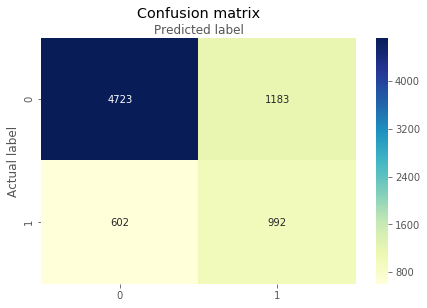

In [52]:
import seaborn as sns


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.762
Precision: 0.4560919540229885
Recall: 0.6223337515683814


In [54]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')  

0.7741880372757255

In [56]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):

    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(logreg, X_train_resample, y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_score_lst.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
    auc_lst.append(roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y = confusion_matrix(y_test, y_pred)

#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))
print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y)
print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y_test, y_pred))

F1 0.7742; AUC 0.7110 
Accuracy of classifier on test set: 0.76
10-fold cross validation average accuracy of classifier: 0.682
Confusion Matrix for Logistic Regression Classfier:
[[4723 1183]
 [ 602  992]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      5906
           1       0.46      0.62      0.53      1594

   micro avg       0.76      0.76      0.76      7500
   macro avg       0.67      0.71      0.68      7500
weighted avg       0.80      0.76      0.77      7500



# **Decision Tree**

In [57]:
# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_resample, y_train_resample)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7288
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5906
           1       0.37      0.40      0.39      1594

   micro avg       0.73      0.73      0.73      7500
   macro avg       0.60      0.61      0.61      7500
weighted avg       0.74      0.73      0.73      7500

[[4824 1082]
 [ 952  642]]


In [58]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):

    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X_train_resample, y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    clf_roc_auc = roc_auc_score(y_test, y_pred)
    f1_score_lst.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y = confusion_matrix(y_test, y_pred)

#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))
print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y)
print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y_test, y_pred))

F1 0.7326; AUC 0.6098 
Accuracy of classifier on test set: 0.73
10-fold cross validation average accuracy of classifier: 0.886
Confusion Matrix for Logistic Regression Classfier:
[[4824 1082]
 [ 952  642]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5906
           1       0.37      0.40      0.39      1594

   micro avg       0.73      0.73      0.73      7500
   macro avg       0.60      0.61      0.61      7500
weighted avg       0.74      0.73      0.73      7500



In [59]:
feature_importance = pd.Series(clf.feature_importances_, index=df.iloc[:,:-1].columns).sort_values(ascending=False)
feature_importance

X6_BI      0.158564
X12_ABS    0.112828
X1         0.099772
X17_ABS    0.093133
X15_ABS    0.092518
X13_ABS    0.092386
X14_ABS    0.086205
X16_ABS    0.077771
X3         0.031234
X5_Bins    0.025109
X4         0.022303
X8_BI      0.015433
X2         0.014388
X12_BI     0.012242
X23_BI     0.010061
X21_BI     0.007367
X20_BI     0.006606
X9_BI      0.006431
X10_BI     0.006231
X22_BI     0.006178
X11_BI     0.005737
X19_BI     0.003795
X7_BI      0.003755
X18_BI     0.003274
X17_BI     0.002494
X16_BI     0.001914
X14_BI     0.000787
X13_BI     0.000741
X15_BI     0.000741
X17_M      0.000000
X16_M      0.000000
X12_M      0.000000
X14_M      0.000000
X15_M      0.000000
X13_M      0.000000
dtype: float64

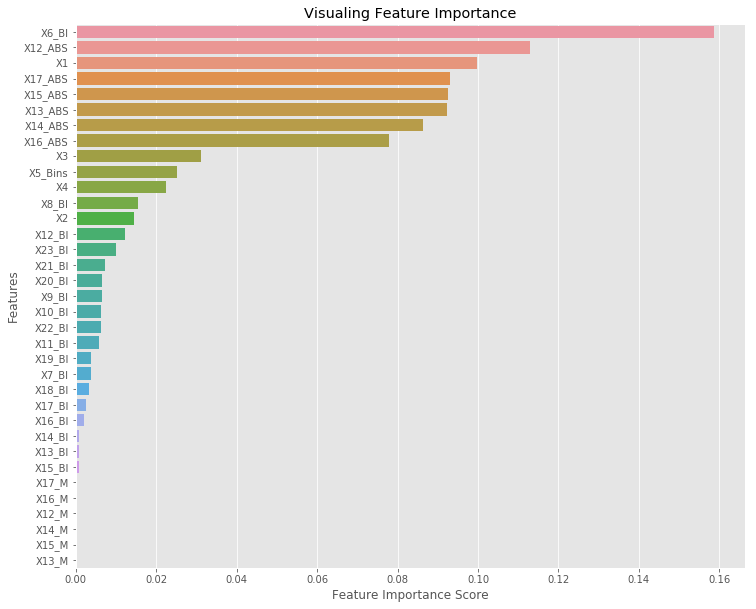

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12,10))

sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualing Feature Importance")

plt.show()

In [ ]:
# X3, X6BI, X1, X12ABS-X17 ABS, x5bins are top 10 